<a href="https://colab.research.google.com/github/nhattminh160901/test/blob/main/test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu==2.0.rc

     |████████████████████████████████| 380.5 MB 23 kB/s 
     |████████████████████████████████| 50 kB 8.1 MB/s 
     |████████████████████████████████| 4.3 MB 48.0 MB/s 
     |████████████████████████████████| 501 kB 59.8 MB/s 


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.0.0-rc0'

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
cd/content/drive/MyDrive/vippro

/content/drive/MyDrive/vippro


In [ ]:
link = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"

In [ ]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=1e3bce83d4812baa5e3c2603373edf99391d5011ab25591723682ac36a4bd23c
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
import wget
wget.download(link)

'traffic-signs-data (1).zip'

In [ ]:
data = "./"

In [ ]:
!unzip -q traffic-signs-data.zip -d $data

replace ./test.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace ./train.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace ./valid.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [ ]:
train_link = data + 'train.p'
valid_link = data + 'valid.p'
test_link = data + 'test.p'

In [ ]:
import pickle
with open(train_link, mode='rb') as f:
  train = pickle.load(f)
with open(valid_link, mode='rb') as f:
  valid = pickle.load(f)
with open(test_link, mode='rb') as f:
  test = pickle.load(f)

In [ ]:
trainX = train['features']
trainY = train['labels']

In [ ]:
trainX.shape

(34799, 32, 32, 3)

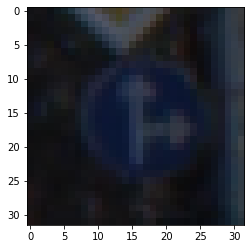

In [ ]:
plt.imshow(trainX[1000])

In [ ]:
trainY[1000]

36

In [ ]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}

In [ ]:
classNames[trainY[1000]]

'Go straight or right'

In [ ]:
from sklearn.utils import shuffle

'No passing'

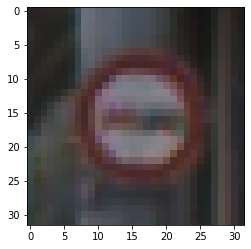

In [ ]:
trainX, trainY = shuffle(trainX, trainY)
plt.imshow(trainX[1000])
classNames[trainY[1000]]

In [ ]:
validX = valid['features']
validY = valid['labels']

testX = test['features']
testY = test['labels']

In [ ]:
trainX = trainX.astype('float') / 255.0
validX = validX.astype('float') / 255.0
testnX = testX.astype('float') / 255.0

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
validY = lb.fit_transform(validY) 

In [ ]:
valid['labels'][1000]

4

In [ ]:
validY[1000]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [ ]:
model = Sequential()

In [ ]:
width = 32
height = 32
classes = 43

shape = (width, height, 3)

In [ ]:
model.add(Conv2D(32, (3, 3), padding='same', input_shape=shape))

In [ ]:
model.add(Activation('relu'))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(32, (3, 3), padding='same', input_shape=shape))

In [ ]:
model.add(Activation('relu'))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
model.add(Conv2D(64, (3, 3), padding='same'))

In [ ]:
model.add(Activation('relu'))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(64, (3, 3), padding='same'))

In [ ]:
model.add(Activation('relu'))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(512))

In [ ]:
model.add(Activation('relu'))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Dense(classes))

In [ ]:
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0

In [ ]:
aug = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [ ]:
learning_rate = 0.01

In [ ]:
epochs = 10

In [ ]:
batch_size = 64

In [ ]:
opt = SGD(learning_rate=learning_rate, momentum=0.9)

In [ ]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(validX, validY), steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs, verbose=1)

Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
543/543 [==============================] - 333s 613ms/step - loss: 1.8941 - accuracy: 0.4491 - val_loss: 1.5925 - val_accuracy: 0.5485
Epoch 2/10
543/543 [==============================] - 334s 614ms/step - loss: 0.7146 - accuracy: 0.7654 - val_loss: 1.2795 - val_accuracy: 0.6388
Epoch 3/10
543/543 [==============================] - 335s 617ms/step - loss: 0.3523 - accuracy: 0.8839 - val_loss: 0.8441 - val_accuracy: 0.7617
Epoch 4/10
543/543 [==============================] - 332s 611ms/step - loss: 0.2041 - accuracy: 0.9340 - val_loss: 0.8007 - val_accuracy: 0.7977
Epoch 5/10
543/543 [==============================] - 333s 614ms/step - loss: 0.1474 - accuracy: 0.9534 - val_loss: 0.6673 - val_accuracy: 0.8290
Epoch 6/10
543/543 [==============================] - 335s 617ms/step - loss: 0.1092 - accuracy: 0.9653 - val_loss: 0.8050 - val_accuracy: 0.8150
Epoch 7/10
543/543 [==========

In [ ]:
saved_model = tf.keras.models.load_model("aa.h5")

AttributeError: ignored

In [ ]:
result = saved_model.predict(testX[1:2])

NameError: ignored

In [ ]:
result

NameError: ignored

In [ ]:
import numpy as np

In [ ]:
final = np.argmax(result)
final = classNames[final]

NameError: ignored

In [ ]:
final

'No entry'

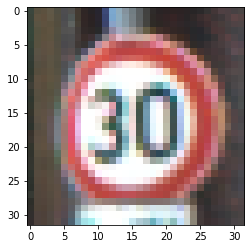

In [ ]:
plt.imshow(test["features"][1])